In [1]:
%matplotlib inline
# importamos la triada de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as statsp

### Genere una submuestra de casos acorde a lo siguiente:
1. Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria. Seleccione el 50% de los casos. Cada base generada debe contener los siguientes elementos:
    - El índice de desarrollo humano (`undp_hdi`)
    - El nombre del país (`ccodealp`)
    - La región a la que pertenece (`ht_region`)
    - El PIB per capita. (`gle_cgdpc`)
    - El total de la población (`imf_pop`).
    
- Si su apellido está entre la A y la M, escoja las siguientes variables del módulo Educación:
    - `ffp_hf`: Human Flight and Brain Drain.
    - `wef_qes`: Quality of the educational system.
    - `wdi_expedu`: Government expenditure on education, total (% of GDP)
    - `wdi_ners`: School enrollment, secondary (% net)
- Si su apellido está entre la N y la Z, escoja las siguientes variables del módulo Salud:
    - `wef_imort`: Infant mortality, deaths/1000 live births.
    - `who_alc2000`: Alcohol consumption per capita (2000-).
    - `who_tobt`: Current smoking of any tobacco product (Total).
    - `wdi_exph`: Government expenditure on health, total (% of GDP).
- Guarde esta tabla procesada en un nuevo objeto. 
- Renombre las categorías de la variable `ht_region` de números a regiones.

In [2]:
df = pd.read_csv('qog_std_cs_jan18.csv')

In [3]:
subsample_ec = df.sample(frac=.5, random_state=1914)

In [4]:
subsample_ec.shape

(97, 1882)

In [5]:
subsample_ec_final = subsample_ec.loc[:,['undp_hdi','cname', 'ccodealp', 'ht_region', 'gle_cgdpc', 'imf_pop', 'ffp_hf', 'wef_qes', 'wdi_expedu','wdi_ners']]

In [6]:
subsample_ec_final.shape

(97, 10)

In [7]:
subsample_ec_final['ht_region'].value_counts()

4     25
5     13
3     13
1     11
9     10
2      8
10     7
6      4
8      3
7      3
Name: ht_region, dtype: int64

In [8]:
subsample_ec_final['ht_region'] = subsample_ec_final['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                                           ['EastEurope', 'LatAm', 'NorthAfrica',
                                                            'SubSaharian', 'WesternDem', 'EastAsia',
                                                            'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])

## Genere una función que ingrese su objeto y devuelva lo siguiente
1. Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos contínuos
- Para cada variable discreta, que calcule la frecuencia.
- Reporte las estadísticas descriptivas para `gle_cgdpc`, `undp_hdi`, `imf_pop`. Compare las estadísticas con algún compañero. ¿Ve alguna diferencia substancial en alguna de ellas?

In [9]:
def fetch_descriptive(dataframe):
    for key, value in dataframe.iteritems():
        print(value.describe())

In [10]:
fetch_descriptive(subsample_ec_final)

count    91.000000
mean      0.700000
std       0.153728
min       0.394000
25%       0.579000
50%       0.733000
75%       0.815000
max       0.948000
Name: undp_hdi, dtype: float64
count           97
unique          97
top       Botswana
freq             1
Name: cname, dtype: object
count      97
unique     97
top       LSO
freq        1
Name: ccodealp, dtype: object
count              97
unique             10
top       SubSaharian
freq               25
Name: ht_region, dtype: object
count        96.000000
mean      15281.021974
std       21202.801711
min         663.570010
25%        2678.752500
50%        6463.520000
75%       18167.547250
max      108481.130000
Name: gle_cgdpc, dtype: float64
count     68.000000
mean      27.278309
std       50.994885
min        0.011000
25%        0.835000
50%        6.412500
75%       33.307499
max      318.789001
Name: imf_pop, dtype: float64
count    86.000000
mean      5.452326
std       2.103707
min       1.000000
25%       4.000000
50%     


## Genere una función que liste las observaciones perdidas de una variable
1. La función debe contener los siguientes argumentos:
    - `dataframe`: La función debe ingresar un objeto DataFrame.
    - `var`: Variable a inspeccionar.
    - `print_list`: Opción para imprimir la lista de observaciones perdidas en la variable. Debe ser `False` por defecto.
- La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.
- Cuando `print_list = True`, debe retornar la lista de casos.
- Analice todas las variables y sus casos perdidos. Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos.

In [11]:
subsample_ec_final['falgnull_imf_pop'] = subsample_ec_final['imf_pop'].isna()

In [12]:
subsample_ec_final['falgnull_imf_pop'].value_counts()

False    68
True     29
Name: falgnull_imf_pop, dtype: int64

In [14]:
def fetch_perdidas(dataframe, var, print_list=False):
    print('Columna:', var)
    print(dataframe[var].isna().value_counts())
    print(dataframe[var].isna().value_counts(True))
    print('\n')
    if print_list==True:
        
        print('Lista de observaciones:')
        print(dataframe['cname'][dataframe[var].isnull()])
        print('\n')

In [15]:
fetch_perdidas(subsample_ec_final, 'imf_pop', False)

Columna: imf_pop
False    68
True     29
Name: imf_pop, dtype: int64
False    0.701031
True     0.298969
Name: imf_pop, dtype: float64




In [16]:
columnas = ['gle_cgdpc', 'imf_pop', 'ffp_hf', 'wef_qes', 'wdi_expedu','wdi_ners']

In [17]:
for i in columnas:
    fetch_perdidas(subsample_ec_final, i)

Columna: gle_cgdpc
False    96
True      1
Name: gle_cgdpc, dtype: int64
False    0.989691
True     0.010309
Name: gle_cgdpc, dtype: float64


Columna: imf_pop
False    68
True     29
Name: imf_pop, dtype: int64
False    0.701031
True     0.298969
Name: imf_pop, dtype: float64


Columna: ffp_hf
False    86
True     11
Name: ffp_hf, dtype: int64
False    0.886598
True     0.113402
Name: ffp_hf, dtype: float64


Columna: wef_qes
False    72
True     25
Name: wef_qes, dtype: int64
False    0.742268
True     0.257732
Name: wef_qes, dtype: float64


Columna: wdi_expedu
False    62
True     35
Name: wdi_expedu, dtype: int64
False    0.639175
True     0.360825
Name: wdi_expedu, dtype: float64


Columna: wdi_ners
False    68
True     29
Name: wdi_ners, dtype: int64
False    0.701031
True     0.298969
Name: wdi_ners, dtype: float64




In [148]:
subsample_ec_final.to_csv('subsample_ec.csv', na_rep='NaN')

Los con mayores valores perdidos son imf_pop, wdi_expedu, wdi_ners

In [79]:
for i in ['imf_pop','wdi_expedu','wdi_ners']:
    fetch_perdidas(subsample_ec_final, i, True)
    

Columna: imf_pop
False    68
True     29
Name: imf_pop, dtype: int64
False    0.701031
True     0.298969
Name: imf_pop, dtype: float64


Lista de observaciones:
151                 Senegal
111                  Monaco
164           Sudan (2012-)
118                 Namibia
65                    Ghana
5       Antigua and Barbuda
99            Liechtenstein
63                   Gambia
190               Venezuela
53        Equatorial Guinea
19                 Botswana
139           Guinea-Bissau
102              Madagascar
49                 Dominica
60                 Djibouti
193                  Zambia
76                    India
145      St Kitts and Nevis
69                Guatemala
89             Korea, North
26                  Burundi
73                 Honduras
29                 Cameroon
95                  Lesotho
169                   Syria
34                     Chad
178            Turkmenistan
159                 Somalia
175    United Arab Emirates
Name: cname, dtype: object


## Grafique los histogramas

* Genere una función que grafique un histograma en conjunto y señale las medias.
* La función debe incluír los siguientes argumentos:
    - `dataframe`: La base de datos donde se encuentran los datos específicos.
    - `var`: La variable a graficar.
    - `sample_mean`: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral. Por defecto debe ser `False`.
    - `true_mean`: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa.
    
* Implemente las funciones para las 4 variables seleccionadas según su grupo. ¿En qué variables la media de la submuestra es mayor a la de la muestra completa?

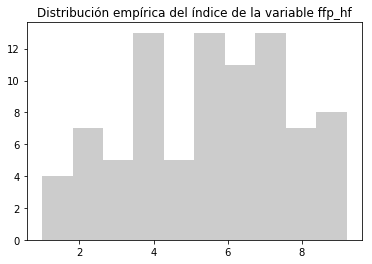

In [80]:
# Test antes de implementar la función
subsample_ec_final_dropna = subsample_ec_final['ffp_hf'].dropna();
plt.hist(subsample_ec_final_dropna, color='grey', alpha=.4)
plt.title("Distribución empírica del índice de la variable ffp_hf");

In [105]:
def plot_hist(dataframe, var, sample_mean = False, true_mean = False):
    dataframe_dropna = dataframe[var].dropna()
    plt.hist(dataframe_dropna, color='grey', alpha=.4)
    plt.title("Distribución empírica del índice de la variable "+var)
    if sample_mean == True:
        plt.axvline(dataframe_dropna.mean(), color='dodgerblue', linestyle='--', lw=2)
    if true_mean ==  True: 
        plt.axvline(df[var].dropna().mean(), color='red', linestyle='-', lw=2)

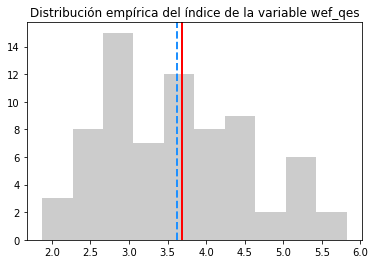

In [106]:
plot_hist(subsample_ec_final, 'wef_qes', True, True)

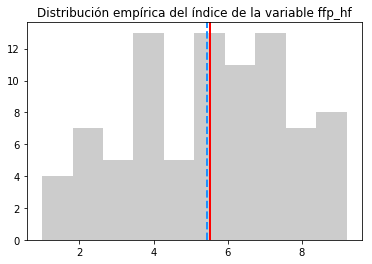

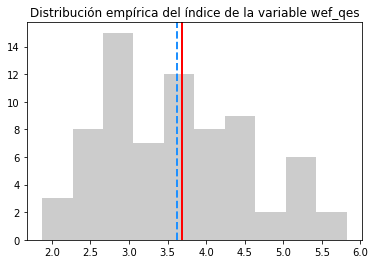

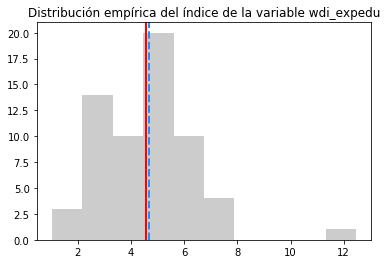

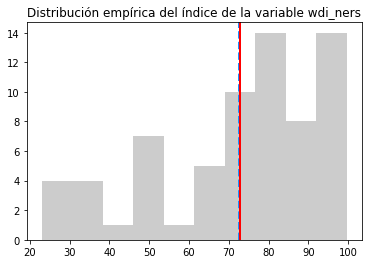

In [108]:
for i in ['ffp_hf', 'wef_qes', 'wdi_expedu','wdi_ners']:
    plt.figure()
    plot_hist(subsample_ec_final, i, True, True)
    

La media es mayor en la submuestra solo en la variable 'wdi_expedu' (gasto del gobierno en educación)


### Genere una función que devuelva un dotplot

* La función debe contener los siguientes argumentos como argumentos:
     - `dataframe`: La tabla de datos donde buscar las variables.
     - `plot_var`: La variable a analizar y extraer las medias.
     - `plot_by`: La variable agrupadora.
     - `global_stat`: Booleano. Si es `True` debe graficar la media global de la variable. Por defecto debe ser `False`.
     - statistic: Debe presentar dos opciones. `mean` para la media y `median` para la mediana. Por defecto debe ser `mean`.
     
 * Implemente la función en las 3 variables con una menor cantidad de datos perdidos.

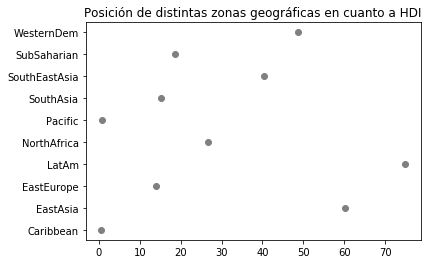

In [113]:
# prueba
group_mean = round(subsample_ec_final.groupby('ht_region')['imf_pop'].mean(),2)
group_mean
plt.title('Posición de distintas zonas geográficas en cuanto a HDI')
plt.plot(group_mean.values, group_mean.index, 'o', color = 'grey')

In [144]:
def get_dotplot(dataframe, plot_var, plot_by, global_stat= False, statistic = 'mean'):
    plt.title('Dot plot agrupado por '+ plot_by+ ' de la variable '+ plot_var )
    group_mean = round(dataframe.groupby(plot_by)[plot_var].mean(),2)
    plt.plot(group_mean.values, group_mean.index, 'o', color ='grey')
    
    if global_stat == True:
        if statistic == 'mean':
            plt.axvline(df[plot_var].mean(), color = 'tomato', linestyle = '--'); # 
        elif statistic == 'median':
            plt.axvline(df[plot_var].median(), color = 'tomato', linestyle = '--')
                

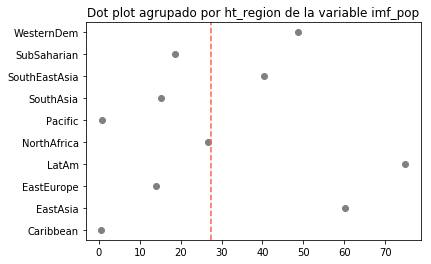

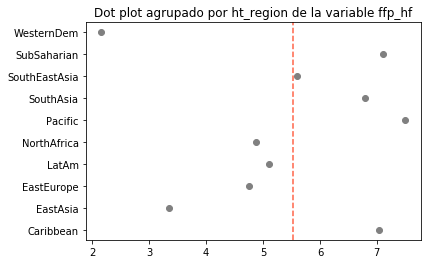

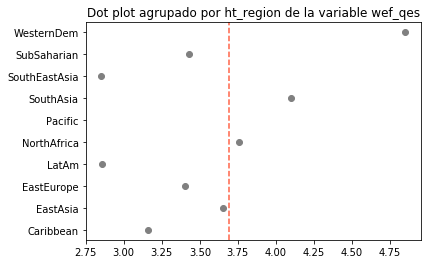

In [145]:
for i in ['imf_pop', 'ffp_hf', 'wef_qes']:
    plt.figure()
   
    get_dotplot(subsample_ec_final,i,'ht_region', True, 'mean')